In [1]:
#import functions
import pandas as pd
import numpy as np


In [2]:
#loading .csv file and checking out null values
df = pd.read_csv('C:/Users/arsha/Desktop/comb2.csv')
df.head()
pd.isnull(df).any()

Id                   False
District Name        False
Neighborhood Name     True
Street                True
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
injuries             False
dead                 False
Victims              False
Vehicle Involved     False
Latitude             False
Longitude            False
Vehicle Type         False
Year                 False
dtype: bool

In [3]:
# Finding all the correlations and sorting data values 
correlations_data = df.corr()['Victims'].sort_values()

# Printing most negative correlations for better understanding data relation
print(correlations_data.head(15), '\n')

# Printing most positive correlations for better understanding data relation
print(correlations_data.tail(15))

Year               -0.066664
Hour               -0.050760
Day                -0.024498
Latitude           -0.020400
Longitude           0.017932
Id                  0.065828
Vehicle Involved    0.087479
dead                0.431851
injuries            0.981269
Victims             1.000000
Name: Victims, dtype: float64 

Year               -0.066664
Hour               -0.050760
Day                -0.024498
Latitude           -0.020400
Longitude           0.017932
Id                  0.065828
Vehicle Involved    0.087479
dead                0.431851
injuries            0.981269
Victims             1.000000
Name: Victims, dtype: float64


In [4]:
df.nunique() #for checking unique values of attributes

Id                   562
District Name         58
Neighborhood Name    401
Street               211
Weekday                7
Month                 12
Day                   31
Hour                  24
Part of the day        5
injuries              25
dead                  10
Victims               36
Vehicle Involved       4
Latitude             544
Longitude            546
Vehicle Type          35
Year                   2
dtype: int64

In [5]:
df.describe()

,Id,Day,Hour,injuries,dead,Victims,Vehicle Involved,Latitude,Longitude,Year
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,283.334520,15.153025,13.935943,2.969751,1.517794,4.496441,1.532028,23.968733,89.894296,2017.537367
std,164.596038,8.753593,5.574914,6.315316,1.201842,6.747085,0.527199,1.151329,2.932998,0.499046
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,21.425297,25.118269,2017.000000
25%,141.250000,7.000000,9.000000,0.000000,1.000000,1.000000,1.000000,23.013285,89.163353,2017.000000
50%,281.500000,15.000000,14.000000,0.000000,1.000000,2.000000,2.000000,23.868786,89.881687,2018.000000
75%,427.750000,23.000000,19.000000,2.000000,2.000000,4.000000,2.000000,24.827016,90.571888,2018.000000
max,568.000000,31.000000,24.000000,40.000000,10.000000,42.000000,4.000000,26.632650,92.219195,2018.000000


In [6]:
# Changing columns names. Replacing spaces by underscores and upper case letters by lower case letters.
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

# after changing new column names
df.columns

Index(['id', 'district_name', 'neighborhood_name', 'street', 'weekday',
       'month', 'day', 'hour', 'part_of_the_day', 'injuries', 'dead',
       'victims', 'vehicle_involved', 'latitude', 'longitude', 'vehicle_type',
       'year'],
      dtype='object')

In [7]:
# Checking on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['district_name', 'neighborhood_name', 'street', 'weekday', 'month',
       'part_of_the_day', 'vehicle_type'],
      dtype='object')

In [8]:
#dropping the unnecessary columns
df = df.drop(columns = [
    'neighborhood_name','street','vehicle_type','latitude','longitude'
    ])

df.head(10)

,id,district_name,weekday,month,day,hour,part_of_the_day,injuries,dead,victims,vehicle_involved,year
0,1,Gopalganj,Sunday,April,1,23,Night,26,8,34,1,2018
1,2,Dhaka,Tuesday,April,3,22,Night,0,2,2,3,2018
2,3,Dhaka,Tuesday,April,3,22,Night,0,2,2,1,2018
3,4,Dhaka,Tuesday,April,3,21,Night,0,1,1,1,2018
4,5,Satkhira,Tuesday,April,3,20,Night,2,2,4,2,2018
5,6,Dinajpur,Wednesday,April,4,6,Morning,0,2,2,2,2018
6,7,Dinajpur,Wednesday,April,4,7,Morning,0,1,1,2,2018
7,8,Chittagong,Wednesday,April,4,6,Morning,0,2,2,1,2018
8,9,Mymensingh,Wednesday,April,4,9,Morning,1,3,4,2,2018
9,10,Khulna,Tuesday,April,3,22,Night,0,1,1,1,2018


In [9]:
#checking out the numeric columns
df._get_numeric_data().columns

Index(['id', 'day', 'hour', 'injuries', 'dead', 'victims', 'vehicle_involved',
       'year'],
      dtype='object')

In [10]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['district_name', 'weekday', 'month', 'part_of_the_day'], dtype='object')

In [11]:
#converting categorical values into numeric values

dummies = pd.get_dummies(df[[
    'district_name', 'weekday', 'month', 'part_of_the_day']])

dummies.head()

,district_name_Bagerhat,district_name_Bandarban,district_name_Barisal,district_name_Bhola,district_name_Bogra,district_name_Brahmanbaria,district_name_Chandpur,district_name_ChapaiNawabganj,district_name_Chittagong,district_name_Chuadanga,...,month_March,month_May,month_November,month_October,month_September,part_of_the_day_Afternoon,part_of_the_day_Evening,part_of_the_day_Morning,part_of_the_day_Night,part_of_the_day_Noon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#checking out data
dummies.head()

,district_name_Bagerhat,district_name_Bandarban,district_name_Barisal,district_name_Bhola,district_name_Bogra,district_name_Brahmanbaria,district_name_Chandpur,district_name_ChapaiNawabganj,district_name_Chittagong,district_name_Chuadanga,...,month_March,month_May,month_November,month_October,month_September,part_of_the_day_Afternoon,part_of_the_day_Evening,part_of_the_day_Morning,part_of_the_day_Night,part_of_the_day_Noon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
#determining the parameters (X,Y) for building classification model

X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [14]:
len(X.columns)


81

In [15]:
X.head()

,district_name_Bagerhat,district_name_Bandarban,district_name_Barisal,district_name_Bhola,district_name_Bogra,district_name_Brahmanbaria,district_name_Chandpur,district_name_ChapaiNawabganj,district_name_Chittagong,district_name_Chuadanga,...,month_June,month_March,month_May,month_November,month_October,month_September,part_of_the_day_Afternoon,part_of_the_day_Evening,part_of_the_day_Morning,part_of_the_day_Night
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: part_of_the_day_Noon, dtype: uint8

In [17]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'district_name'. 
df['district_name']= label_encoder.fit_transform(df['district_name']) 
  
df['district_name'].unique() 

array([18, 12, 50, 13,  8, 36, 26, 21,  5, 24, 52, 31, 32, 55, 49,  7, 40,
       34, 35, 46, 16, 48, 27,  4, 38, 14, 45, 57, 23, 54, 53, 47, 43, 51,
       15, 17, 39, 20, 37, 22, 10,  0, 56, 44,  6, 19, 42, 11, 33,  3, 25,
       29,  1, 28,  2,  9, 41, 30], dtype=int64)

In [18]:
# joining numeric columns
X = pd.concat([X, df._get_numeric_data()], axis=1)  
X.head(5)

,district_name_Bagerhat,district_name_Bandarban,district_name_Barisal,district_name_Bhola,district_name_Bogra,district_name_Brahmanbaria,district_name_Chandpur,district_name_ChapaiNawabganj,district_name_Chittagong,district_name_Chuadanga,...,part_of_the_day_Night,id,district_name,day,hour,injuries,dead,victims,vehicle_involved,year
0,0,0,0,0,0,0,0,0,0,0,...,1,1,18,1,23,26,8,34,1,2018
1,0,0,0,0,0,0,0,0,0,0,...,1,2,12,3,22,0,2,2,3,2018
2,0,0,0,0,0,0,0,0,0,0,...,1,3,12,3,22,0,2,2,1,2018
3,0,0,0,0,0,0,0,0,0,0,...,1,4,12,3,21,0,1,1,1,2018
4,0,0,0,0,0,0,0,0,0,0,...,1,5,50,3,20,2,2,4,2,2018


In [19]:
#dropping out the target column

X = X.drop(columns = ['victims'])
X.head(2)

,district_name_Bagerhat,district_name_Bandarban,district_name_Barisal,district_name_Bhola,district_name_Bogra,district_name_Brahmanbaria,district_name_Chandpur,district_name_ChapaiNawabganj,district_name_Chittagong,district_name_Chuadanga,...,part_of_the_day_Morning,part_of_the_day_Night,id,district_name,day,hour,injuries,dead,vehicle_involved,year
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,18,1,23,26,8,1,2018
1,0,0,0,0,0,0,0,0,0,0,...,0,1,2,12,3,22,0,2,3,2018


In [20]:
# evaluate an LDA model on the dataset using k-fold cross validation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#model
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=6, random_state=6)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.9358461069168001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
#spliting the whole dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  449 113
length of y_train and y_test:  449 113


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions,average='micro')*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s


Baseline: N_features:  89
Baseline: Accuracy:  100.0
Cohen Kappa: 1.0
Baseline: Recall:  100.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [23]:
rfcg

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions,average='micro')*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s


Baseline: N_features:  89
Baseline: Accuracy:  100.0
Cohen Kappa: 1.0
Baseline: Recall:  100.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [25]:
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion matrix')

Confusion matrix
[[112   0]
 [  0   1]]


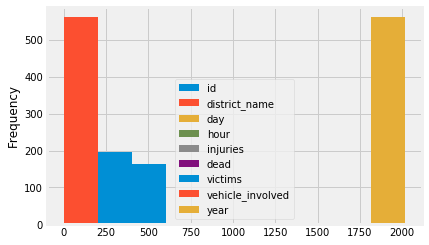

In [26]:
#Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


LR: 0.993283 (0.014285)
XGB: 0.995556 (0.008889)
KNN: 0.955455 (0.024345)
DT: 0.986667 (0.014741)
SVM: 0.957677 (0.020977)
RF: 0.957677 (0.020977)
ADA: 0.997778 (0.006667)


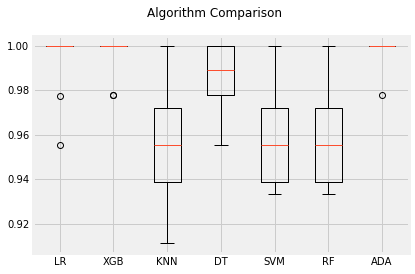

In [28]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

xgb = XGBClassifier()
logreg2= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 5
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()